# Get quick insights about the species you're working on!

Retrieve useful stats using GenomeInfo for desired species.

In [1]:
# Assumming you are running this from your computer
# At this moment, GenomeInfo is not available in pypi yet

%cd ../
!pip3 install -e .

/home/alejandro/Documents/projects/forks/genomeinfo
Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/alejandro/Documents/projects/forks/genomeinfo
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for genomeinfo (pyproject.toml) ... done
  Created wheel for genomeinfo: filename=genomeinfo-0.1.0-py2.py3-none-any.whl size=2327 sha256=53ce877682e61a6a75f45e4398587bc38f6925a3e3849f59b4be67452f75ddcc
  Stored in directory: /tmp/pip-ephem-wheel-cache-pujs6iy3/wheels/4e/cb/e8/0baa7aa991848767127e29ea4738849dea6d2c9bd867edb942
Successfully built genomeinfo
  Attempting uninstall: genomeinfo
    Found existing installation: genomeinfo 0.1.0
    Uninstalling genomeinfo-0.1.0:
      Successfully uninstalled genomeinfo-0.1.0


In [46]:
# import GenomeInfo from the package!

from genomeinfo import GenomeInfo
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# use the connect() method to retrieve our database!

db = GenomeInfo.connect()

In [48]:
# you can easily see what's inside the database by just running .info()

db.info()

Genome Information:
Species:
  - caenorhabditis_elegans, homo_sapiens, mus_musculus, drosophila_melanogaster, danio_rerio, bos_taurus, gallus_gallus, canis_lupus_familiaris

Common Names:
  - celegans, human, mouse, fruitfly, zebrafish, cow, chicken, dog

Assemblies (UCSC):
  - ce11, ce6, hg19, hg38, hg17, hg18, mm9, mm10, mm39, mm6, mm7, mm8, dm3, dm6, danRer6, danRer7, danRer10, danRer11, danRer5, bosTau9, galGal7, canFam4, hs1, canFam2, canFam3, canFam6, ROS_Cfam_1.0, galGal3, galGal4, galGal5, galGal6, canFam5

Assemblies (NCBI):
  - WS144, WBcel215, WBcel235, WS190, WS195, GRCh37, GRCh38, NCBI35, NCBI36, MGSCv37, GRCm38, GRCm39, MGSCv34, MGSCv35, MGSCv36, Release_5, Release_6, Release_6_plus_ISO1_MT, Zv8, Zv9, GRCz10, GRCz11, Zv7, ARS-UCD1.1, ARS-UCD1.2, ARS-UCD1.3, ARS-UCD2.0, bGalGal1.mat.broiler.GRCg7b, UU_Cfam_GSD_1.0, T2T-CHM13, ASM3317019v1, ASM3317019v2, CanFam2.0, CanFam3.1, Dog10K_Boxer_Tasha, ROS_Cfam_1.0, Gallus_gallus-2.1, Gallus_gallus-4.0, Gallus_gallus-5.0, GRCg6, G

In [49]:
# for this example, we are going to use the dog as our model!

df = db.get_db().set_index("common_name").loc["dog",:].reset_index()

In [50]:
# here, we extract the scaffold-N50 in kb for each dog assembly

n50 = [(df.loc[idx, "assembly"], df.loc[idx, "metadata"].get('scaffold-N50')/1000) for idx in df.index]

In [51]:
# let's have a look!

n50

[('UU_Cfam_GSD_1.0', 64299.765),
 ('CanFam2.0', 45337.677),
 ('CanFam3.1', 45876.61),
 ('Dog10K_Boxer_Tasha', 63738.581),
 ('ROS_Cfam_1.0', 64037.277),
 ('UMICH_Zoey_3.1', 64204.256)]

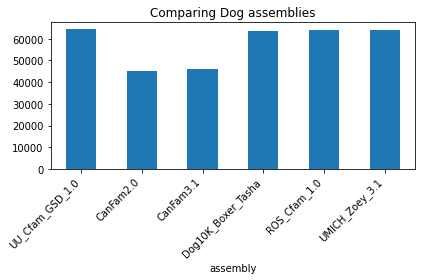

In [52]:
# now, we are going to plot it!

ax = pd.DataFrame(n50, columns=['assembly', 'n50']).set_index('assembly').plot(kind='bar', legend=False, title="Comparing Dog assemblies")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()